In [1]:
%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [3]:
import cytoflow as flow

In [10]:
# this is not the way cytoflow is meant to be used!

tubes = [flow.Tube(file = "beads.fcs", conditions = {"tube" : "beads"}),
         flow.Tube(file = "blank.fcs", conditions = {"tube" : "blank"}),
         flow.Tube(file = "ebfp.fcs", conditions = {"tube" : "ebfp"}),
         flow.Tube(file = "eyfp.fcs", conditions = {"tube" : "eyfp"}),
         flow.Tube(file = "mkate.fcs", conditions = {"tube" : "mkate"}),
         flow.Tube(file = "rby.fcs", conditions = {"tube" : "rby"})]

ex = flow.ImportOp(conditions = {'tube' : "category"},
                          tubes = tubes).apply()

<IPython.core.display.Javascript object>


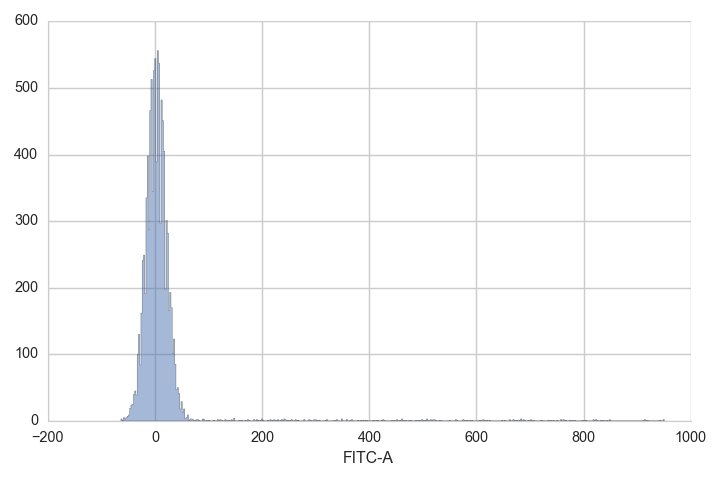

In [14]:
flow.HistogramView(channel = "FITC-A",
                   subset = "tube == 'blank'").plot(ex)

<IPython.core.display.Javascript object>


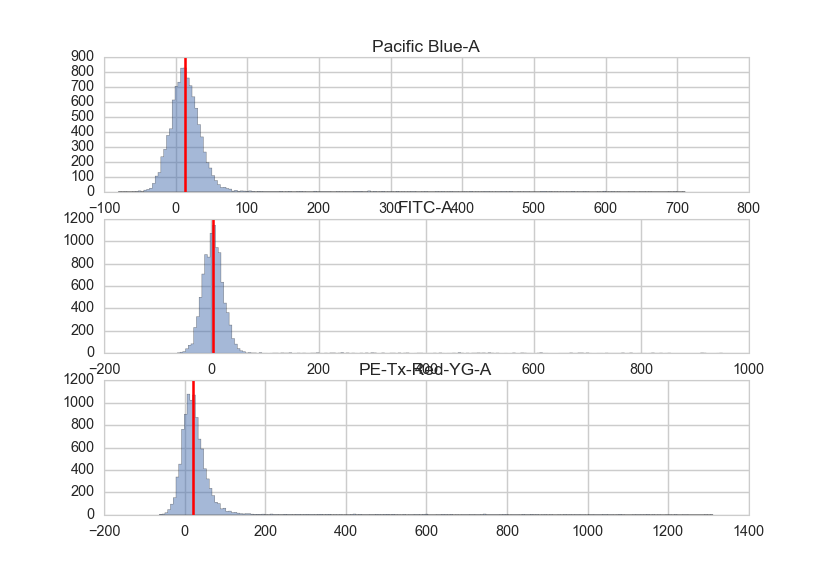

In [16]:
af_op = flow.AutofluorescenceOp()
af_op.name = "AF"
af_op.blank_file = "blank.fcs"
af_op.channels = ["Pacific Blue-A", "FITC-A", "PE-Tx-Red-YG-A"] 

af_op.estimate(ex)
af_op.default_view().plot()
ex2 = af_op.apply(ex)

In [17]:
af_op._af_median

{'FITC-A': 3.4800000190734863,
 'PE-Tx-Red-YG-A': 21.15999984741211,
 'Pacific Blue-A': 12.800000190734863}

In [18]:
af_op._af_stdev

{'FITC-A': 77.11998565547066,
 'PE-Tx-Red-YG-A': 117.84230806595949,
 'Pacific Blue-A': 51.38079964603144}